First we import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Now we load the data

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


We Normalize it

In [3]:
# Agregar una dimensión de canal para la CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Now let´s create the convolutional NN

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


C:\Users\Rosa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train it
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9012 - loss: 1.1115 - val_accuracy: 0.9778 - val_loss: 0.0748
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9799 - loss: 0.0649 - val_accuracy: 0.9836 - val_loss: 0.0523
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0483 - val_accuracy: 0.9771 - val_loss: 0.0783
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0397 - val_accuracy: 0.9889 - val_loss: 0.0398
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9907 - loss: 0.0315 - val_accuracy: 0.9854 - val_loss: 0.0495


In [7]:
# Evalutate it
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en test: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9812 - loss: 0.0654
Precisión en test: 0.9854


In [8]:
# Let´s define a method to test the CNN
def predict_digit(index):
    img = x_test[index].reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(img))
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {prediction}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


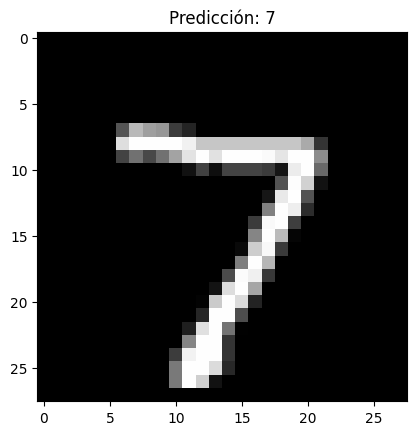

In [9]:
# Let´s see with the first image
predict_digit(0)